In [15]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.test_functions import Ishigami
from SALib import ProblemSpec


sp = ProblemSpec({
        "names": ["x1", "x2"],
        "groups": None,
        "bounds": [[-np.pi, np.pi]] * 2,
        "outputs": ["Y"],
    })

(
    sp.sample_latin(8365)
)


Samples:
	2 parameters: ['x1', 'x2']
	8365 samples


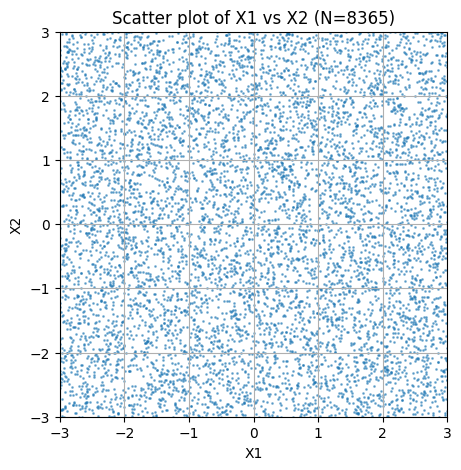

In [16]:
X = sp.samples

# plot scatter of X1 vs X2
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"Scatter plot of X1 vs X2 (N={X.shape[0]})")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()
plt.savefig("sobol_scatter_plot.png", dpi=300)


(-3.0, 3.0)

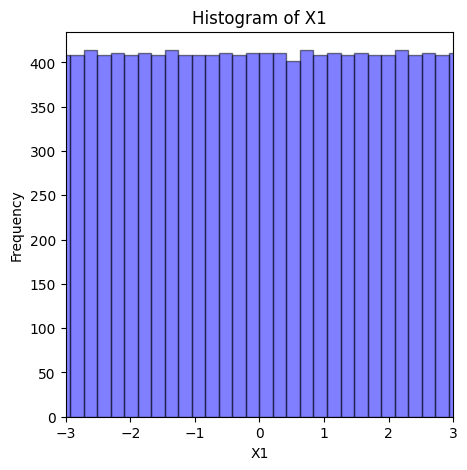

In [10]:
# plot histogram of X1
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(X[:, 0], bins=30, alpha=0.5, color='blue', edgecolor='black')
ax.set_xlabel("X1")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of X1")
ax.set_xlim(-3, 3)

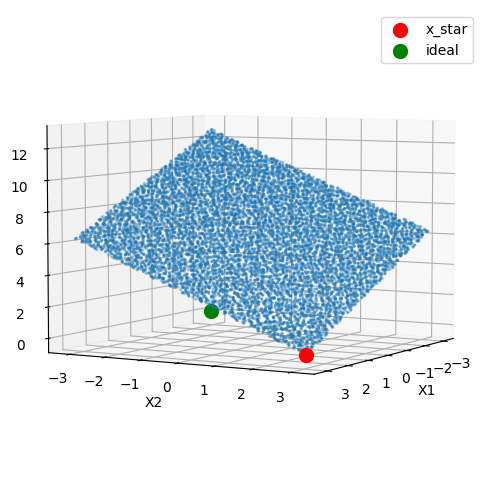

In [7]:
# Calculate differentce between each point and x_star
x_star = np.max(X, axis=0)
x_ideal = np.min(X, axis=0)

method_options = [
    'euclidean',
    'manhattan',
    'chebyshev',
    'minkowski',
    'cosine',
    'jaccard',
    'braycurtis',
    'canberra',
]

def distance(x, method='euclidean'):
    """
    Calculate distance using different methods.
    """
    
    
    if method not in method_options:
        raise ValueError(f"Method must be one of {method_options}.")
    elif method == 'euclidean':
        return np.linalg.norm(x - x_star)
    elif method == 'manhattan':
        return np.sum(np.abs(x - x_star))
    elif method == 'chebyshev':
        return np.max(np.abs(x - x_star))
    elif method == 'minkowski':
        p = 3
        return np.sum(np.abs(x - x_star) ** p) ** (1/p)
    elif method == 'cosine':
        return 1 - np.dot(x, x_star) / (np.linalg.norm(x) * np.linalg.norm(x_star))
    elif method == 'jaccard':
        intersection = np.sum(np.minimum(x, x_star))
        union = np.sum(np.maximum(x, x_star))
        return 1 - intersection / union
    elif method == 'braycurtis':
        return np.sum(np.abs(x - x_star)) / np.sum(np.abs(x + x_star))
    elif method == 'canberra':
        return np.sum(np.abs(x - x_star) / (np.abs(x) + np.abs(x_star)))
    else:
        raise ValueError(f"Unknown method: {method}")
    

# for method in method_options:
#     # Calculate distances
#     distances = np.array([distance(x, method) for x in X])

#     # plot scatter of x1 vs distance
#     plt.figure(figsize=(8, 6))
#     plt.scatter(X[:, 0], distances, s=1, alpha=0.5)
#     plt.xlabel("X1")
#     plt.ylabel(f"Distance to x_star ({method})")
#     plt.title(f"Distance to x_star using {method} method")
#     plt.grid()
#     plt.show()


# Calculate distances
method = 'manhattan'
distances = np.array([distance(x, method) for x in X])


# # plot scatter of x1 vs distance
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], distances, s=1, alpha=0.5)
# plt.xlabel("X1")
# plt.ylabel(f"Distance to x_star ({method})")
# plt.title(f"Distance to x_star using {method} method")
# plt.grid()
# plt.show()

# # plot scatter of x1 vs distance
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 1], distances, s=1, alpha=0.5)
# plt.xlabel("X1")
# plt.ylabel(f"Distance to x_star ({method})")
# plt.title(f"Distance to x_star using {method} method")
# plt.grid()
# plt.show()


# plot 3d scatter of x1, x2 vs distance
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# add x_star to the plot
ax.scatter(x_star[0], x_star[1], 0, color='red', s=100, label='x_star')

# add 'ideal' at [min(x1), min(x2), 0]
ax.scatter(np.min(X[:, 0]), np.min(X[:, 1]), 0.0, color='green', s=100, label='ideal')

ax.legend()
ax.scatter(X[:, 0], X[:, 1], distances, s=2, alpha=0.3)


ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel(f"D ({method})")
# ax.set_title(f"Distance to x_star using {method} method")

# rotate the plot
ax.view_init(elev=5, azim=30)
plt.grid()

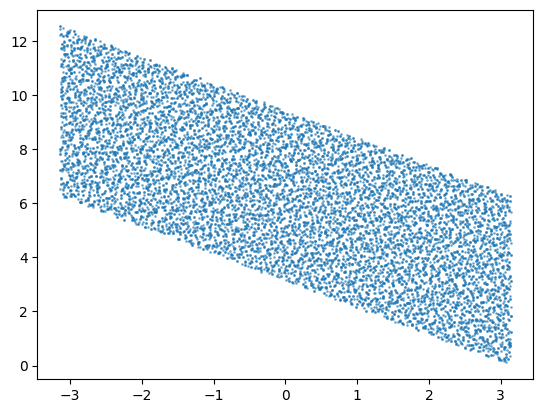

In [4]:
plt.scatter(X[:, 0], distances, s=1, alpha=0.5)

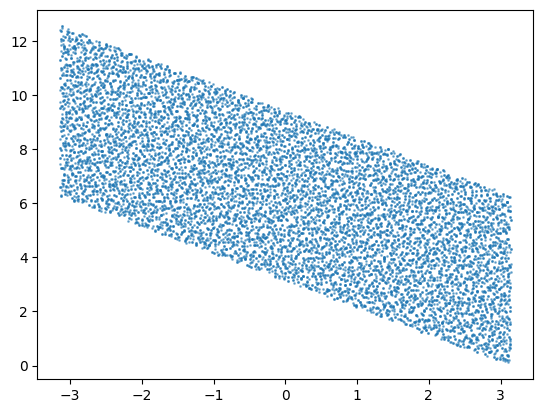

In [5]:
plt.scatter(X[:, 1], distances, s=1, alpha=0.5)